In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# warning removal
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load data
df = pd.read_csv("Fraud Detection Dataset 01.csv")
#head of the data
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,T1,4174,1292.76,ATM Withdrawal,16.0,Tablet,San Francisco,0.0,119.0,13.0,Debit Card,0.0
1,T2,4507,1554.58,ATM Withdrawal,13.0,Mobile,New York,4.0,79.0,3.0,Credit Card,0.0
2,T3,1860,2395.02,ATM Withdrawal,NaN,Mobile,NaN,3.0,115.0,9.0,NaN,0.0
3,T4,2294,100.10,Bill Payment,15.0,Desktop,Chicago,4.0,3.0,4.0,UPI,0.0
4,T5,2130,1490.50,POS Payment,19.0,Mobile,San Francisco,2.0,57.0,7.0,Credit Card,0.0


In [ ]:
#checking data types
df.dtypes

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions    float64
Account_Age                         float64
Number_of_Transactions_Last_24H     float64
Payment_Method                       object
Fraudulent                          float64
dtype: object

In [ ]:
#checking for missing values
df.isnull().sum()

Transaction_ID                        0
User_ID                               0
Transaction_Amount                  730
Transaction_Type                      0
Time_of_Transaction                 734
Device_Used                         699
Location                            695
Previous_Fraudulent_Transactions      1
Account_Age                           1
Number_of_Transactions_Last_24H       1
Payment_Method                      727
Fraudulent                            1
dtype: int64

In [ ]:
#checking for duplicates
df.duplicated().sum()

0

In [ ]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#filling missing values categorical data with mode and numerical data with mean
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode().values[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [ ]:
#checking for missing values
df.isnull().sum()

Transaction_ID                      0
User_ID                             0
Transaction_Amount                  0
Transaction_Type                    0
Time_of_Transaction                 0
Device_Used                         0
Location                            0
Previous_Fraudulent_Transactions    0
Account_Age                         0
Number_of_Transactions_Last_24H     0
Payment_Method                      0
Fraudulent                          0
dtype: int64

In [ ]:
#Composition of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14797 entries, 0 to 14796
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Transaction_ID                    14797 non-null  object 
 1   User_ID                           14797 non-null  int64  
 2   Transaction_Amount                14797 non-null  float64
 3   Transaction_Type                  14797 non-null  object 
 4   Time_of_Transaction               14797 non-null  float64
 5   Device_Used                       14797 non-null  object 
 6   Location                          14797 non-null  object 
 7   Previous_Fraudulent_Transactions  14797 non-null  float64
 8   Account_Age                       14797 non-null  float64
 9   Number_of_Transactions_Last_24H   14797 non-null  float64
 10  Payment_Method                    14797 non-null  object 
 11  Fraudulent                        14797 non-null  float64
dtypes: f

In [ ]:
#Descriptive analysis
df.describe()

,User_ID,Transaction_Amount,Time_of_Transaction,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Fraudulent
count,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000,14797.000000
mean,3003.194161,3032.233689,11.416767,1.999121,60.060151,7.515139,0.049608
std,1155.145894,5106.448176,6.733778,1.416863,34.334379,4.024355,0.217134
min,1000.000000,5.030000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1993.000000,1319.950000,6.000000,1.000000,31.000000,4.000000,0.000000
50%,2995.000000,2654.390000,11.416767,2.000000,60.000000,8.000000,0.000000
75%,4009.000000,3713.430000,17.000000,3.000000,90.000000,11.000000,0.000000
max,4999.000000,49997.800000,23.000000,4.000000,119.000000,14.000000,1.000000


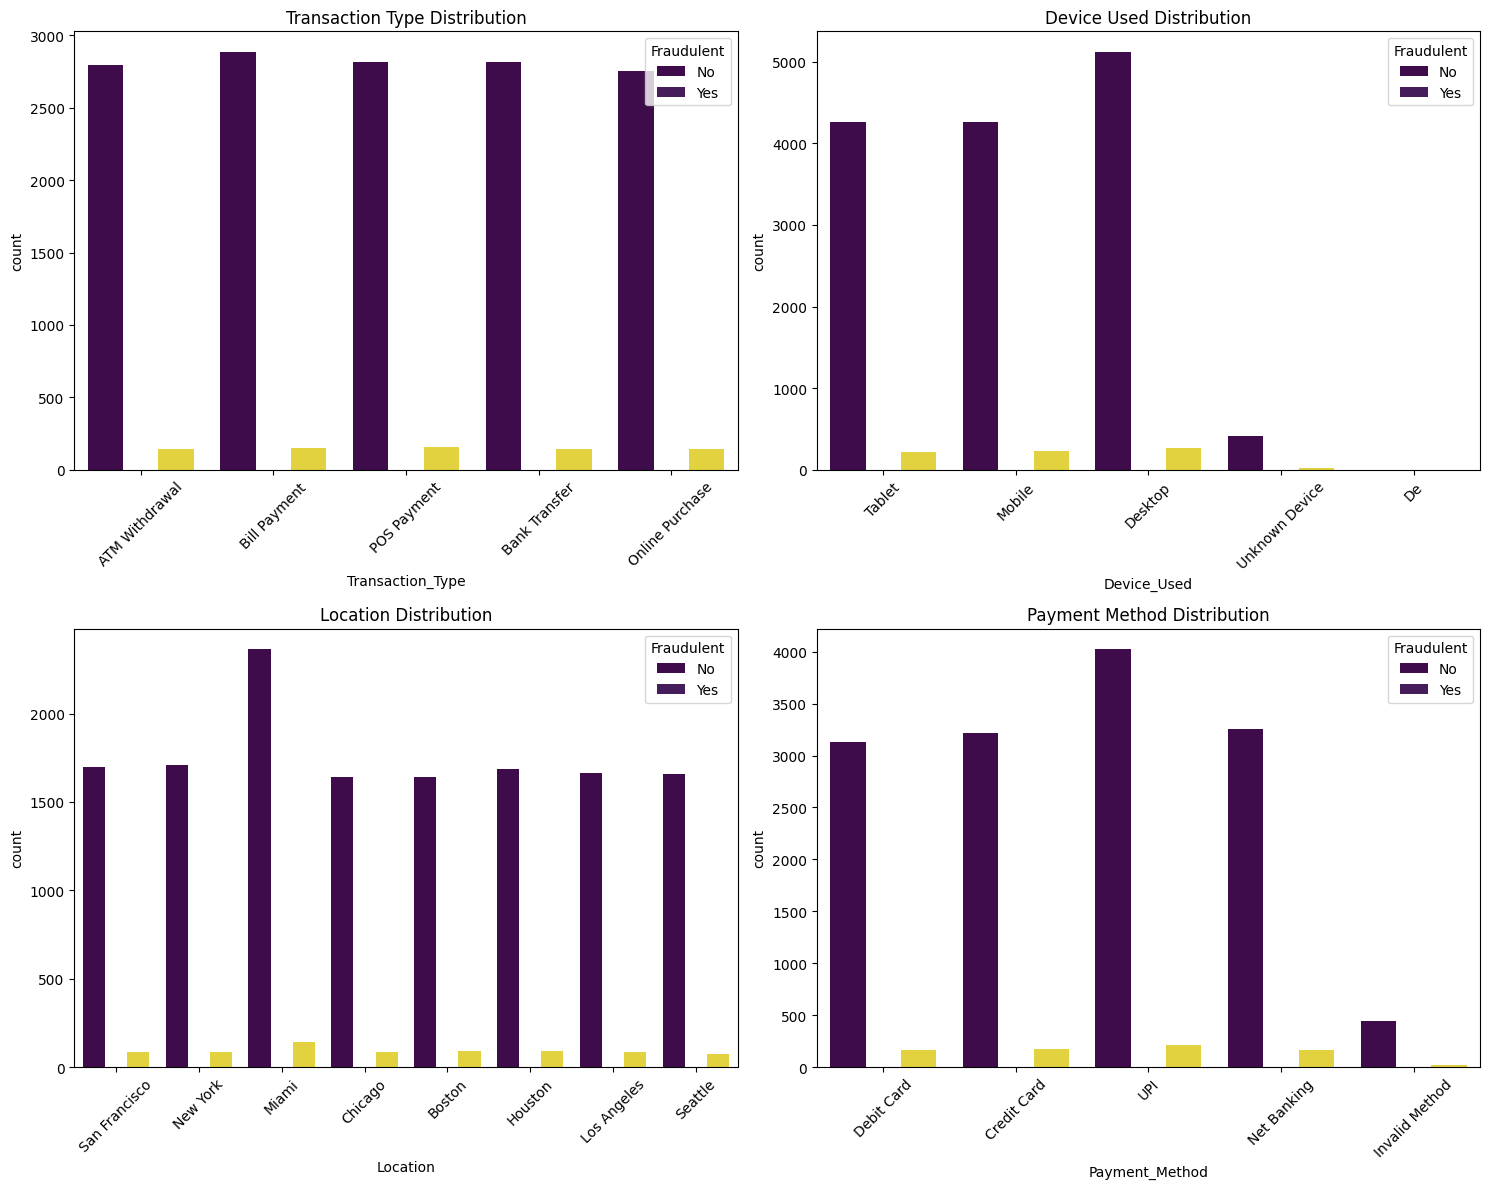

In [ ]:
# Creating the figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # 2 rows, 2 columns

# Define categorical columns
categories = ['Transaction_Type', 'Device_Used', 'Location', 'Payment_Method']
titles = ['Transaction Type Distribution', 'Device Used Distribution', 'Location Distribution', 'Payment Method Distribution']

# Loop through categories and create countplots
for ax, category, title in zip(axes.flatten(), categories, titles):
    sns.countplot(data=df, x=category, palette='viridis', hue='Fraudulent', ax=ax)
    ax.legend(title='Fraudulent', labels=['No', 'Yes'])
    ax.set_title(title)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

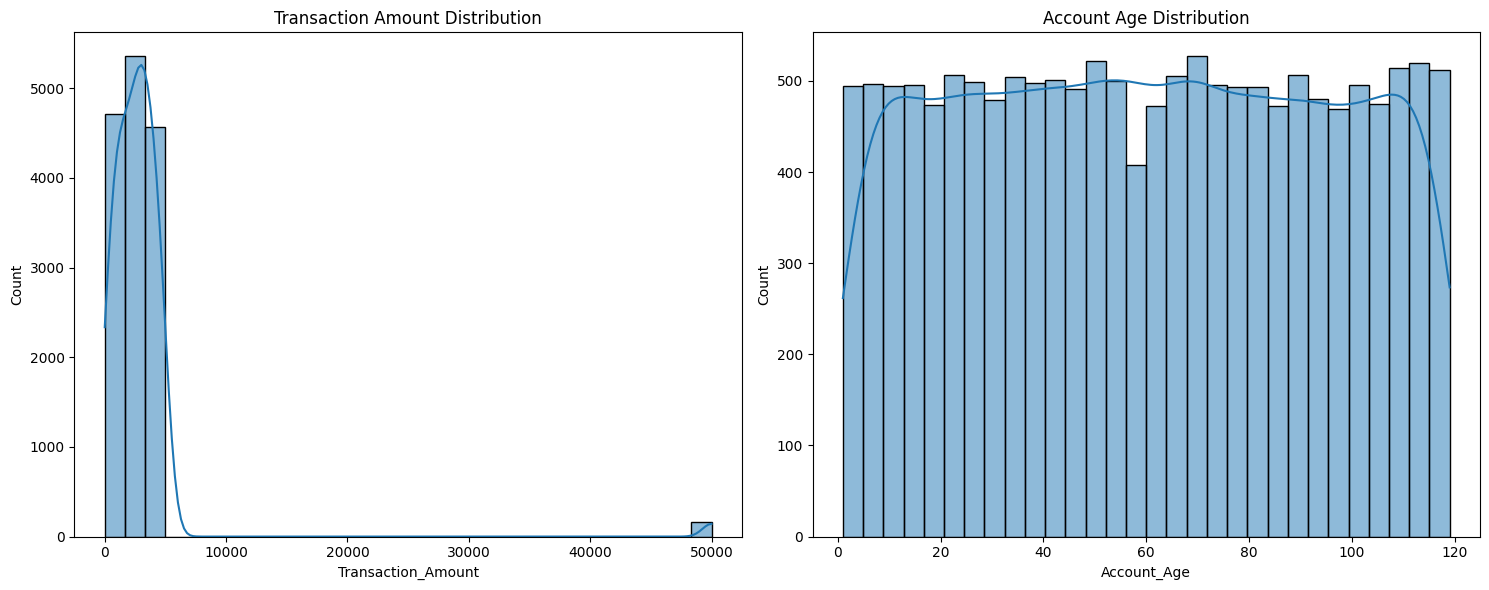

In [ ]:
# Creating subplots for numerical features
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram for Transaction Amount
sns.histplot(data=df, x='Transaction_Amount', bins=30, kde=True, palette='viridis', ax=axes[0])
axes[0].set_title('Transaction Amount Distribution')

# Histogram for Account Age
sns.histplot(data=df, x='Account_Age', bins=30, kde=True, palette='viridis', ax=axes[1])
axes[1].set_title('Account Age Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
#removing the columns that are not needed Transaction_ID, User_ID
df.drop(['Transaction_ID', 'User_ID'], axis=1, inplace=True)
df.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,ATM Withdrawal,16.000000,Tablet,San Francisco,0.0,119.0,13.0,Debit Card,0.0
1,1554.58,ATM Withdrawal,13.000000,Mobile,New York,4.0,79.0,3.0,Credit Card,0.0
2,2395.02,ATM Withdrawal,11.416767,Mobile,Miami,3.0,115.0,9.0,UPI,0.0
3,100.10,Bill Payment,15.000000,Desktop,Chicago,4.0,3.0,4.0,UPI,0.0
4,1490.50,POS Payment,19.000000,Mobile,San Francisco,2.0,57.0,7.0,Credit Card,0.0


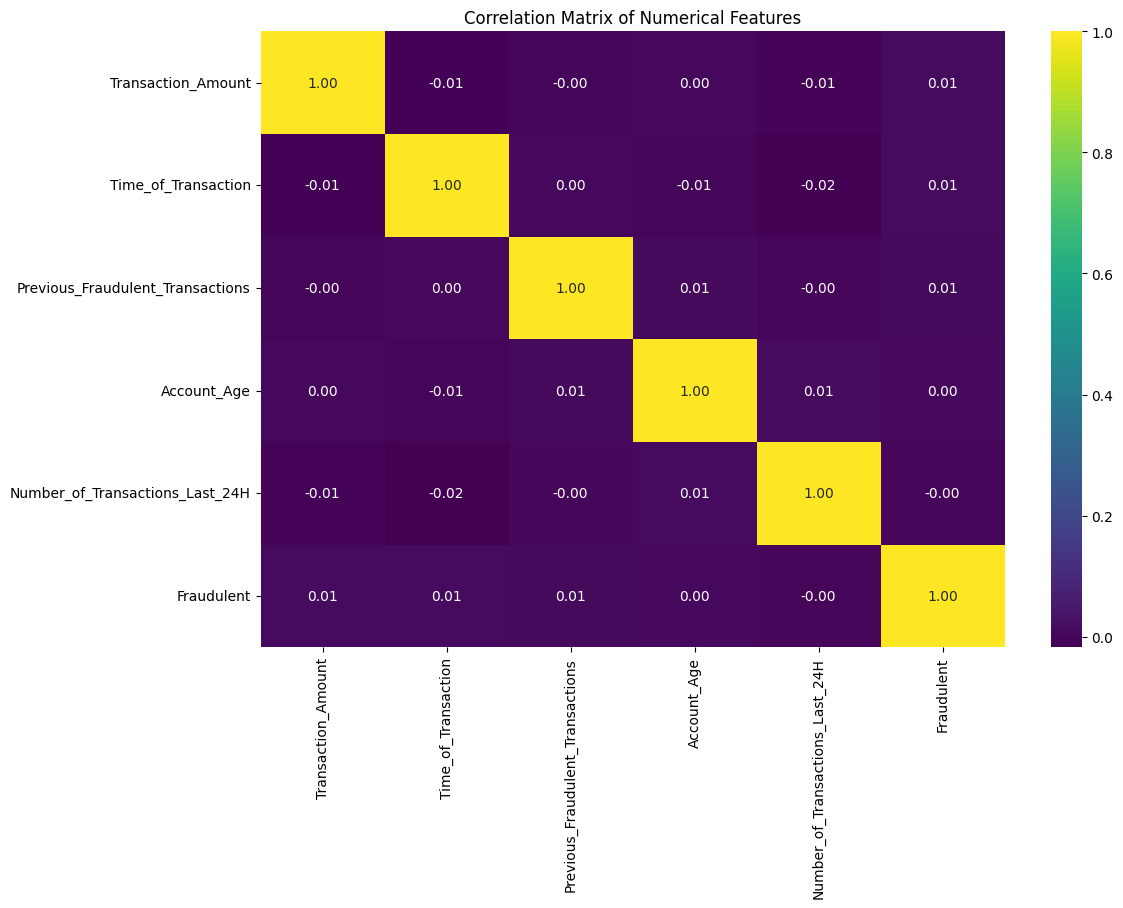

In [ ]:
# Correlation matrix of numerical features
corr_matrix = df.corr(numeric_only=True)
#plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# Encoding categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Encoding categorical features
df['Transaction_Type'] = le.fit_transform(df['Transaction_Type'])
df['Device_Used'] = le.fit_transform(df['Device_Used'])
df['Location'] = le.fit_transform(df['Location'])
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])
# Display the head of the data
df.head()

,Transaction_Amount,Transaction_Type,Time_of_Transaction,Device_Used,Location,Previous_Fraudulent_Transactions,Account_Age,Number_of_Transactions_Last_24H,Payment_Method,Fraudulent
0,1292.76,0,16.000000,3,6,0.0,119.0,13.0,1,0.0
1,1554.58,0,13.000000,2,5,4.0,79.0,3.0,0,0.0
2,2395.02,0,11.416767,2,4,3.0,115.0,9.0,4,0.0
3,100.10,2,15.000000,1,1,4.0,3.0,4.0,4,0.0
4,1490.50,4,19.000000,2,6,2.0,57.0,7.0,0,0.0


In [ ]:
# Fixing SMOTE usage by ensuring the target is categorical
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Define features (X) and target (y)
X = df.drop('Fraudulent', axis=1)  # Replace 'Fraudulent' with your actual target column name
y = df['Fraudulent']
# Ensure the target is integer type
y = y.astype(int)

# Apply SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_smote)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)

# Show result shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((22500, 9), (5626, 9), (22500,), (5626,))

In [ ]:
#y_smote.value_counts()

In [ ]:
# Standardizing the data
from sklearn.preprocessing import StandardScaler
# Instantiate StandardScaler
scaler = StandardScaler()
# Fit and transform X_smote
X_scaled = scaler.fit_transform(X_smote)

In [ ]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_smote, test_size=0.2, random_state=42)
# Display the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((22500, 9), (5626, 9), (22500,), (5626,))

In [ ]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
# Fit the model
rf.fit(X_train, y_train)
# Predict the target
y_pred = rf.predict(X_test)
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2824
           1       0.99      0.93      0.96      2802

    accuracy                           0.96      5626
   macro avg       0.96      0.96      0.96      5626
weighted avg       0.96      0.96      0.96      5626

Accuracy: 0.9610735869178813


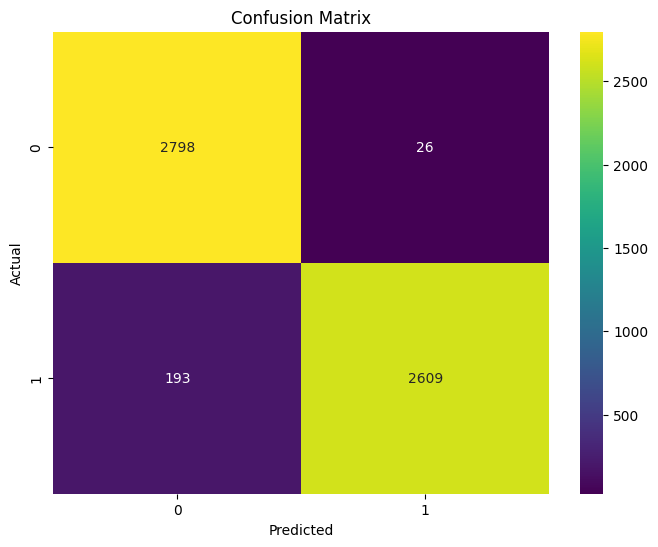

In [ ]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

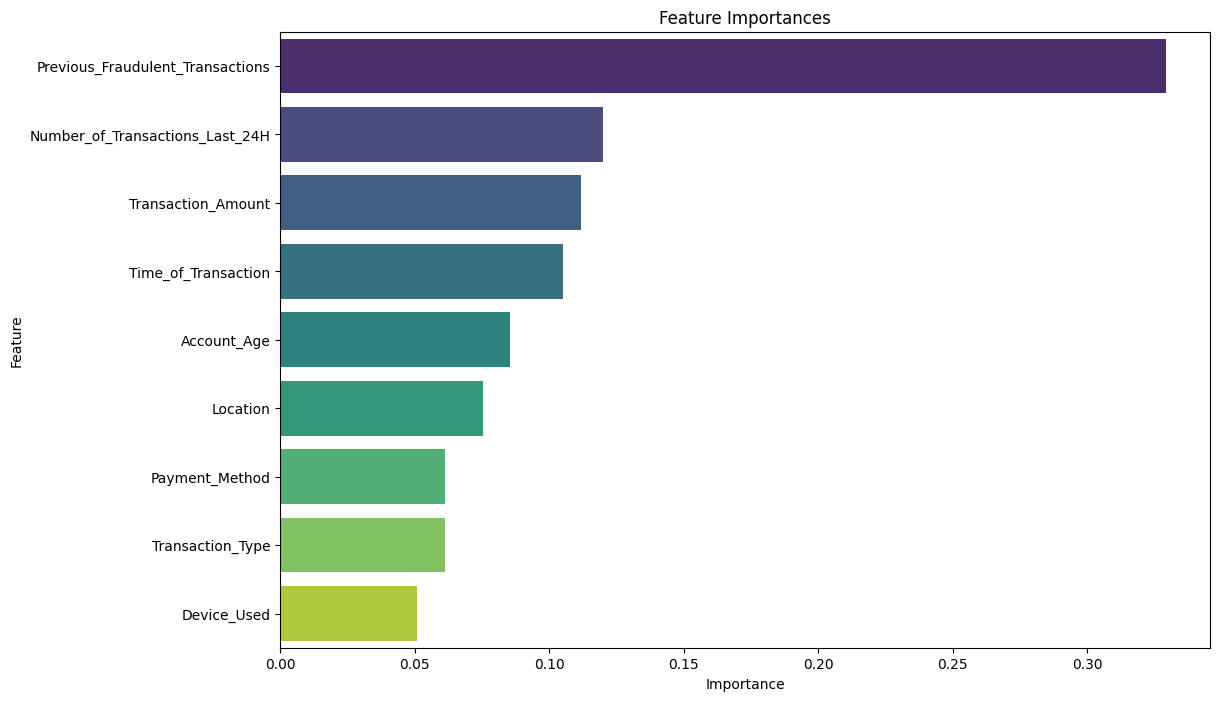

In [ ]:
#Feature Importance
# Get feature importance
importances = rf.feature_importances_
# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# Sort values
feature_importances = feature_importances.sort_values('Importance', ascending=False)
# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances')
plt.show()

In [ ]:
# --- Prediction code starts here ---

# Input dictionary (change these values for different predictions)
input_data = {
    'Transaction_Amount': 544.810000,
    'Transaction_Type': 2,
    'Time_of_Transaction': 2.000000,
    'Device_Used': 2,
    'Location': 0,
    'Previous_Fraudulent_Transactions': 3,
    'Account_Age': 6,
    'Number_of_Transactions_Last_24H': 9,
    'Payment_Method': 4
}

# Convert input to DataFrame
input_df = pd.DataFrame([input_data])

# Refit encoders on full DataFrame for prediction (this won't affect the model)
le_tt = LabelEncoder()
le_du = LabelEncoder()
le_loc = LabelEncoder()
le_pm = LabelEncoder()

le_tt.fit(df['Transaction_Type'])
le_du.fit(df['Device_Used'])
le_loc.fit(df['Location'])
le_pm.fit(df['Payment_Method'])

# Apply encoders to input
input_df['Transaction_Type'] = le_tt.transform(input_df['Transaction_Type'])
input_df['Device_Used'] = le_du.transform(input_df['Device_Used'])
input_df['Location'] = le_loc.transform(input_df['Location'])
input_df['Payment_Method'] = le_pm.transform(input_df['Payment_Method'])

# Scale the input using the trained scaler
input_scaled = scaler.transform(input_df)

# Make the prediction
prediction = rf.predict(input_scaled)

# Output the result
if prediction[0] == 1:
    print("This transaction is predicted to be FRAUDULENT.")
else:
    print("This transaction is predicted to be NOT FRAUDULENT.")


This transaction is predicted to be NOT FRAUDULENT.


In [ ]:
import pyttsx3

# Initialize the speaker engine
engine = pyttsx3.init()

# Set voice rate (default is ~200)
engine.setProperty('rate', 130)  # You can reduce it even more if needed

# Set volume (0.0 to 1.0)
engine.setProperty('volume', 1.0)  # Max volume

# You can also set voice (male/female) if you want
# voices = engine.getProperty('voices')
# engine.setProperty('voice', voices[1].id)  # 0 = male, 1 = female (depends on system)

# Your result text
if prediction[0] == 1:
    result_text = "This transaction is predicted to be fraudulent."
else:
    result_text = "This transaction is predicted to be not fraudulent."

# Print and speak
print("🔊 " + result_text)
engine.say(result_text)
engine.runAndWait()


🔊 This transaction is predicted to be not fraudulent.


In [ ]:
import joblib

# Save the trained model and preprocessors
joblib.dump(rf, "rf_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_tt, "le_tt.pkl")
joblib.dump(le_du, "le_du.pkl")
joblib.dump(le_loc, "le_loc.pkl")
joblib.dump(le_pm, "le_pm.pkl")


['le_pm.pkl']